<a href="https://colab.research.google.com/github/DIPESHGOEL27/Vehicle_Routing_Problem_Solver-using-GA/blob/main/Vehicle_Routing_Problem_Solver_using_GAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre-requisite: Installing deap library

In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.2 MB/s eta 0:00:00


Step 1: Import Required Libraries

This step imports necessary libraries for random number generation, numerical computations, plotting, and the DEAP library for genetic algorithm implementation.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

Step 2: Define Problem Parameters

Define the number of locations to visit, randomly generate coordinates for these locations, define the depot's coordinates, and specify the number of available vehicles.

In [ ]:
num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3


Step 3: Genetic Algorithm Setup

Define a fitness function to minimize (distance and balance penalty), create an individual structure and register functions for creating individuals and populations.

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


Step 4: Define the Fitness Function

This function evaluates an individual's fitness by calculating the total distance traveled by vehicles and a penalty for imbalance among their travel distances.

In [ ]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

Step 5: Register Genetic Operators

Register functions for evaluation, crossover (permutation-based representation), mutation, and selection.


In [ ]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


Step 6: Plotting Function

Define a function to plot the routes of vehicles and locations.


In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

Step 7: Running the Genetic Algorithm

Define the main function to execute the genetic algorithm. It initializes the population, sets up statistics tracking, runs the algorithm (eaSimple), and plots the best route found.

gen	nevals	avg    	min    
0  	300   	613.184	4.41432
1  	213   	589.856	8.69226
2  	243   	581.261	4.14386
3  	232   	568.731	5.47524
4  	233   	565.47 	5.58931
5  	218   	549.813	2.04624
6  	213   	538.992	3.0765 
7  	233   	528.333	3.04321
8  	219   	518.062	2.83114
9  	209   	502.088	1.57371
10 	224   	503.988	1.57371
11 	230   	496.086	3.8587 
12 	230   	495.081	6.22903
13 	217   	475.39 	4.57231
14 	231   	470.801	4.57231
15 	250   	452.776	3.59099
16 	238   	443.701	1.04585
17 	236   	430.534	1.04585
18 	225   	424.073	1.04585
19 	225   	413.446	1.04585
20 	209   	405.311	2.84925
21 	232   	399.52 	2.84925
22 	237   	394.073	0.445415
23 	217   	393.535	0.393434
24 	227   	382.901	1.42032 
25 	246   	379.751	1.75118 
26 	233   	365.239	1.59835 
27 	219   	354.183	1.08568 
28 	229   	348.563	1.25122 
29 	223   	342.067	2.77624 
30 	238   	340.218	1.73293 
31 	225   	337.377	2.78612 
32 	221   	338.865	3.43374 
33 	243   	329.335	2.88787 
34 	232   	325.517	2.88787 
35 	244   	323.

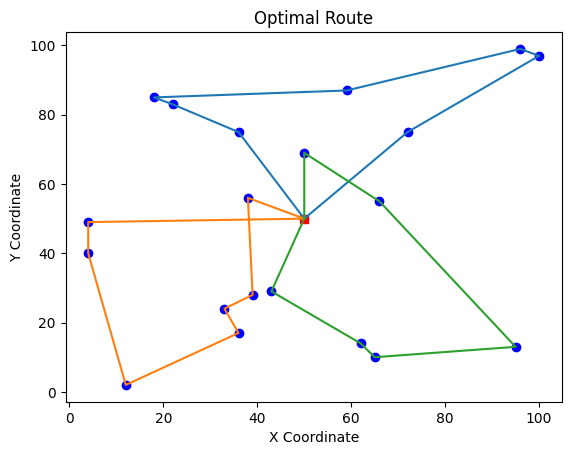

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
